# **Ejemplo 2_4:** Determinación de observaciones influyentes: método de jackknife

---



**PROBLEMA**: Queremos averiguar si existe algún dato  influyente para los procedimientos estadísticos de calcular la **media** y la **mediana**.
> Vamos a generar una muestra simulando los ingresos de un vecindario. Supongamos que hay un vecino con unos ingresos signficativamente altos.


SERGIO MANUEL SUÁREZ SUÁREZ


In [37]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Generación de datos
# ==============================================================================
# Generamos (100 elementos) ingresos uniformemente distribuidos en [15000,25000]
datos = 15000+np.random.rand(100)*10000
datos_ord = datos
datos_ord.sort()
datos

array([15015.27223628, 15041.44049621, 15071.21048118, 15207.64445912,
       15479.11769338, 15496.02540877, 15503.45076631, 15630.60192542,
       15758.8902173 , 15845.3190041 , 15909.81902518, 16008.45559792,
       16070.84197772, 16102.9688639 , 16358.73579244, 16383.37645607,
       16388.47638182, 16446.14608183, 16479.62260585, 16504.5732525 ,
       16522.10538023, 16588.08097806, 16670.9521629 , 16887.29317587,
       17029.89761559, 17062.31057754, 17140.08735665, 17266.71140016,
       17332.20168362, 17390.12513274, 17568.33589991, 17596.221639  ,
       17630.02329858, 17706.09691229, 17877.90707197, 18326.23719592,
       18485.5294274 , 19164.99089636, 19331.22921546, 19629.80237101,
       19835.60886043, 19864.44946584, 20080.34601723, 20092.88437784,
       20105.78169164, 20120.07105204, 20194.48922433, 20198.51841213,
       20204.15906301, 20234.45706851, 20384.42311525, 20404.28390762,
       20438.83443508, 20486.53587698, 20577.45415046, 20803.5284331 ,
      

**Ejercicio**: Calcular la media y la mediana antes de realizar la modificación de incluir unos ingresos de 500.000€

In [12]:
media = np.mean(datos)
mediana = np.median(datos)
print(f" Media = {media} y Mediana = {mediana}")

 Media = 19883.846568078876 y Mediana = 19763.23796331836


In [38]:
# El vecino 50 tiene unos ingresos significativamente mayores que el resto
datos[50]=500000
datos

array([ 15015.27223628,  15041.44049621,  15071.21048118,  15207.64445912,
        15479.11769338,  15496.02540877,  15503.45076631,  15630.60192542,
        15758.8902173 ,  15845.3190041 ,  15909.81902518,  16008.45559792,
        16070.84197772,  16102.9688639 ,  16358.73579244,  16383.37645607,
        16388.47638182,  16446.14608183,  16479.62260585,  16504.5732525 ,
        16522.10538023,  16588.08097806,  16670.9521629 ,  16887.29317587,
        17029.89761559,  17062.31057754,  17140.08735665,  17266.71140016,
        17332.20168362,  17390.12513274,  17568.33589991,  17596.221639  ,
        17630.02329858,  17706.09691229,  17877.90707197,  18326.23719592,
        18485.5294274 ,  19164.99089636,  19331.22921546,  19629.80237101,
        19835.60886043,  19864.44946584,  20080.34601723,  20092.88437784,
        20105.78169164,  20120.07105204,  20194.48922433,  20198.51841213,
        20204.15906301,  20234.45706851, 500000.        ,  20404.28390762,
        20438.83443508,  

Cálculo de media y mediana en toda la muestra

In [6]:
media = np.mean(datos)
mediana = np.median(datos)
print(f" Media = {media} y Mediana = {mediana}")

 Media = 18549.286828820692 y Mediana = 14098.944689085303


Notar que los ingresos del barrio son aprox. 20000 euros. El hecho que se haya trasladado un vecino rico ha incrementando aprox. en 5000 euros la media. La mediana es insensible a este hecho. Se trata de identificar que datos son influyentess para los dos procedimientos estadísticos

Ejercicio: Aplicar el método de describe para ver un resumen estadístico de los datos.

**Ejercicio**: Aplicar el método de Probabilidad global, para detectar los outliers utilizado en el ejemplo 2_3_Outliers

In [39]:
import scipy.stats as st
p_g=0.95
alfa_g=(1-p_g)/2
alfa= 1-(1-alfa_g)**(1/len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)
print(f" Alfa ={alfa}")
print(f" Z_alfa ={Z_alfa}")

 Alfa =0.00025
 Z_alfa =3.65906


In [40]:
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ -150220.4902,199968.6639]


In [41]:
# Después de calcular las bandas vemos que valores están fuera, que por tanto serían outliers
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")

 El dato[50]=500000.0 es un outlier


Otra forma de detactar los outliers

**Método :**  Detectemos los outlier de phi medinate el método Jackknife y a continuación aplicamos el método de la distancia entre Quartiles

In [47]:
phi=np.zeros(len(datos)) # phi es un array de la misma longitud que datos pero con el valor cero en cada una de sus posiciones
# En el bucle lo que se realiza es el método Jackknife, es decir, prepara los datos para realizar un análisis estadístico sin el dato i.
# Para ello, calcula la media de todos los elementos excluyendo el elemento de la posición i que está procesando en el bucle.
# De forma que obtiene un índice de calidad del modelo para cada uno de los elementos
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.mean(datos_sin_i)
phi

array([24973.67082758, 24973.40650172, 24973.1057948 , 24971.72767381,
       24968.98551993, 24968.81473493, 24968.73973131, 24967.45537617,
       24966.15953484, 24965.28651679, 24964.63500143, 24963.63867241,
       24963.00850696, 24962.68399295, 24960.10048863, 24959.85159303,
       24959.80007863, 24959.21755641, 24958.8794097 , 24958.62738297,
       24958.45029077, 24957.78387059, 24956.94678791, 24954.76152516,
       24953.32107627, 24952.99367261, 24952.20804858, 24950.92901784,
       24950.26749983, 24949.68241448, 24947.88230572, 24947.60063159,
       24947.25920068, 24946.49078034, 24944.75532419, 24940.22673708,
       24938.61772464, 24931.75447747, 24930.07530253, 24927.05941207,
       24924.98055865, 24924.6892394 , 24922.50846615, 24922.38181605,
       24922.25154015, 24922.10720318, 24921.35550447, 24921.3148056 ,
       24921.25782933, 24920.95178887, 20074.8351936 , 24919.23636625,
       24918.88737102, 24918.40553828, 24917.48717188, 24915.20359327,
      

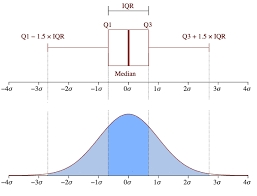

In [48]:
# Aplicamos el método de la distancia entre cuartiles, en este caso, al aplicar el método Jackknife no obtenemos
# el valor del elemento que es considerado Outlier, sino la posición del mismo.
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la media")

 El dato 50 es una observación influyente para la media


In [49]:
pd.DataFrame(phi).describe()

,0
count,100.000000
mean,24874.086842
std,485.792016
min,20074.835194
25%,24896.059800
50%,24920.094078
75%,24953.075524
max,24973.670828


**Ejercicio**: Repetir el mismo procedimiento (método Jackenife) de detectar los outliers pero con la mediana en lugar de con la media: ¿Qué ocurre? ¿observas variaciones?

In [45]:
phi=np.zeros(len(datos))
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.median(datos_sin_i) # Con la mediana
phi

array([20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20404.28390762, 20404.28390762,
       20404.28390762, 20404.28390762, 20234.45706851, 20234.45706851,
       20234.45706851, 20234.45706851, 20234.45706851, 20234.45706851,
      

In [46]:
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la mediana")

In [44]:
pd.DataFrame(phi).describe()

,0
count,100.000000
mean,20319.370488
std,85.341198
min,20234.457069
25%,20234.457069
50%,20319.370488
75%,20404.283908
max,20404.283908
